# idea taken from: https://www.kaggle.com/code/sambitmukherjee/d-s-s-faster-r-cnn-data-prep/notebook

In [163]:
from pathlib import Path
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
import psutil
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg")

In [ ]:
import os
from pathlib import Path
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.io import read_image

In [149]:
working_folder = Path("/kaggle/working/")
images_folder = working_folder/"images"
images_folder.mkdir()

FileExistsError: [Errno 17] File exists: '/kaggle/working/images'

In [164]:
data_folder = Path("/kaggle/input/child-mind-institute-detect-sleep-states")
!ls {data_folder}

sample_submission.csv  train_events.csv
test_series.parquet    train_series.parquet


In [165]:
#train_series = pd.read_parquet(data_folder/"train_series.parquet")
#train_series

KeyboardInterrupt: 

In [166]:
file = '/kaggle/input/gamma-train-series-updated-11-11-2023/train_series_10112023.parquet'

DEV = False

series_id  = pd.read_parquet(file, columns=['series_id'])
series_id = series_id.series_id.unique()

print(len(series_id))

if DEV:
    series_id = series_id[::10]

269


In [167]:
from sklearn.model_selection import train_test_split

series_id_train, series_id_test = train_test_split(series_id, 
                                   random_state=1234,  
                                   test_size=0.25,  
                                   shuffle=True)

In [168]:
series_ids_in_val = series_id_test
len(series_ids_in_val)

68

In [169]:
series_ids_in_val

array(['1762ab70ec76', '416354edd92a', 'bdfce9ce62b9', 'c75b4b207bea',
       'c908a0ad3e31', '8a22387617c3', '2fbbee1a38e3', 'a2b0a64ec9cf',
       'c7d693f24684', 'ece2561f07e9', '3c336d6ba566', 'fcca183903b7',
       'f0482490923c', '785c9ca4eff7', 'c107b5789660', 'bfa54bd26187',
       'a9a2f7fac455', '3be2f86c3e45', '78569a801a38', 'b737f8c78ec5',
       '6bf95a3cf91c', '18a0ca03431d', 'fe90110788d2', '2f7504d0f426',
       'c289c8a823e0', '655f19eabf1e', '8a306e0890c0', '1955d568d987',
       '062dbd4c95e6', '90eac42a9ec9', '3aceb17ef7bd', 'def21f50dd3c',
       'e1f2a4f991cb', 'bccf2f2819f8', '4a31811f3558', '8becc76ea607',
       '062cae666e2a', '3d53bfea61d6', 'ea0770830757', '5f94bb3e1bed',
       'b7188813d58a', '35826366dfc7', '5f40907ec171', '08db4255286f',
       '60d31b0bec3b', '0cd1e3d0ed95', '91cb6c98201f', 'eef041dd50aa',
       '612aa8ba44e2', '44d8c02b369e', '2b8d87addea9', 'd3dddd3c0e00',
       '18b61dd5aae8', '44a41bba1ee7', 'e2b60820c325', 'f56824b503a0',
      

In [170]:
train_events = pd.read_csv(data_folder/"train_events.csv")
train_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07T09:17:00-0400
14506,fe90110788d2,35,onset,NaN,NaN


In [171]:
series_ids=series_id
series_ids

array(['038441c925bb', '03d92c9f6f8a', '0402a003dae9', '04f547b8017d',
       '05e1944c3818', '062cae666e2a', '062dbd4c95e6', '08db4255286f',
       '0a96f4993bd7', '0cd1e3d0ed95', '0ce74d6d2106', '0cfc06c129cc',
       '0d0ad1e77851', '0dee4fda51c3', '0ec9fc461819', '0ef7d94fde99',
       '0f572d690310', '10469f6765bf', '1087d7b0ff2e', '10f8bc1f7b07',
       '12d01911d509', '1319a1935f48', '137771d19ca2', '137b99e936ab',
       '13b4d6a01d27', '148471991ffb', '154fe824ed87', '16fe2798ed0f',
       '1716cd4163b2', '1762ab70ec76', '188d4b7cd28b', '18a0ca03431d',
       '18b61dd5aae8', '1955d568d987', '1b92be89db4c', '1c7c0bad1263',
       '1d4569cbac0f', '1e6717d93c1d', '1f96b9668bdf', '207eded97727',
       '25e2b3dd9c3b', '2654a87be968', '27f09a6a858f', '280e08693c6d',
       '292a75c0b94e', '29c75c018220', '29d3469bd15d', '2b0a1fa8eba8',
       '2b8d87addea9', '2cd2340ca14d', '2e9ced2c7976', '2f7504d0f426',
       '2fbbee1a38e3', '31011ade7c0a', '3318a0e3ed6f', '33ceeba8918a',
      

In [172]:
len(series_ids)

269

In [150]:
#series_ids=series_ids[0:3]
#series_ids

In [173]:
def feat_eng(df):
    
    df['series_id'] = df['series_id'].astype('category')
    df['timestamp_2'] = pd.to_datetime(df['timestamp']).apply(lambda t: t.tz_localize(None))
    df['hour'] = df["timestamp_2"].dt.hour
    
    df.sort_values(['timestamp_2'], inplace=True)
    df.set_index('timestamp_2', inplace=True)

    df["anglez"] = df["anglez"].astype(np.float32)
    df["anglezdiffabs"] = df["anglez"].diff().abs().astype(np.float32)
    
    for col in ['anglezdiffabs']:
        
        # periods in seconds        
        periods = [60] 
        
        for n in periods:
            
            rol_args = {'window':f'{n+5}s', 'min_periods':10, 'center':True}
            
            for agg in ['median']:
                df[f'{col}_{agg}_{n}'] = df[col].rolling(**rol_args).agg(agg).astype(np.float32).values
                gc.collect()
            
            gc.collect()
    
    df.reset_index(inplace=True)
    df.dropna(inplace=True)

    return df

In [174]:
def feat_eng_by_id(idx):
    
    from warnings import simplefilter 
    simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    
    df  = pd.read_parquet('/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet',
                          filters=[('series_id','=',idx)])
    df = feat_eng(df)
    
    return df

In [175]:
from tqdm.auto import tqdm 
from joblib import Parallel, delayed
from time import sleep, time
from multiprocessing import cpu_count
import gc

In [176]:
%%time

import joblib

print("Number of jobs: ",int(cpu_count()))

#train_df = []

window_properties = []
all_events = []

for idx in tqdm(series_ids): 

    train_series = feat_eng_by_id(idx)
    train_series['large_enmo'] = train_series['enmo'] > 0.1509000062942505
    train_series['anglezdiffabs_median_60_norm'] = (train_series['anglezdiffabs_median_60']-np.min(train_series['anglezdiffabs_median_60']))/ (max(train_series['anglezdiffabs_median_60'])-min(train_series['anglezdiffabs_median_60']))
    
    series = train_series.reset_index(drop=True)
    series['color'] = ["blue" if large_enmo else "green" for large_enmo in series['large_enmo']]
    series['timestamp'] = pd.to_datetime(series['timestamp'])
    series['timestamp_utc'] = series['timestamp'].map(lambda timestamp: timestamp.astimezone(timezone.utc))
    series['anglez_radians'] = (np.pi / 180) * series['anglez']
    series['cos_anglez'] = np.cos(series['anglez_radians'])
    series['enmo'] = np.clip(series['enmo'], 0, 1)
    min_date_utc = series['timestamp_utc'].dt.date.min()
    max_date_utc = series['timestamp_utc'].dt.date.max()
    series_24_hour_windows = {}
    upper_bound = datetime(year=min_date_utc.year, month=min_date_utc.month, day=min_date_utc.day, hour=20, minute=30, tzinfo=timezone.utc)
    lower_bound = upper_bound + timedelta(hours=-24) # 8:30pm UTC on the previous day.
    while lower_bound < series['timestamp_utc'].max():
        window_df = series.loc[(series['timestamp_utc'] >= lower_bound) & (series['timestamp_utc'] < upper_bound)].reset_index(drop=True)
        if len(window_df) > 0:
            series_24_hour_windows[upper_bound.isoformat()[:-6]] = window_df
        upper_bound += timedelta(hours=24)
        lower_bound += timedelta(hours=24)

    events = train_events.loc[train_events['series_id'] == idx].reset_index(drop=True)
    events = events.loc[events['timestamp'].notna()].reset_index(drop=True)
    events['timestamp'] = pd.to_datetime(events['timestamp'])
    events['timestamp_utc'] = events['timestamp'].map(lambda timestamp: timestamp.astimezone(timezone.utc))
    events_24_hour_windows = {}
    upper_bound = datetime(year=min_date_utc.year, month=min_date_utc.month, day=min_date_utc.day, hour=20, minute=30, tzinfo=timezone.utc)
    lower_bound = upper_bound + timedelta(hours=-24) # 8:30pm UTC on the previous day.
    while lower_bound < series['timestamp_utc'].max():
        window_df = events.loc[(events['timestamp_utc'] >= lower_bound) & (events['timestamp_utc'] < upper_bound)].reset_index(drop=True)
        if len(window_df) > 0:
            events_24_hour_windows[upper_bound.isoformat()[:-6]] = window_df
        upper_bound += timedelta(hours=24)
        lower_bound += timedelta(hours=24)
    
    windows = list(series_24_hour_windows.keys())
    num_steps_cumulative = 0
    for window_idx, window in enumerate(windows):        
        fig = plt.figure(figsize=(14.4, 4))  # (width, height) in inches
        #plt.plot(series_24_hour_windows[window]['timestamp_utc'], series_24_hour_windows[window]['cos_anglez'], color="red")
        plt.plot(series_24_hour_windows[window]['timestamp_utc'],
                 series_24_hour_windows[window]['anglezdiffabs_median_60_norm'],
                 color="red")
        plt.scatter(
            series_24_hour_windows[window]['timestamp_utc'], 
            series_24_hour_windows[window]['enmo'], 
            color=series_24_hour_windows[window]['color'], 
            s=1
        )
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.margins(0, 0)
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        plt.savefig(images_folder/f"{idx}_{window}.jpg", bbox_inches="tight", pad_inches=0)
        plt.clf()
        plt.cla()
        plt.close()

        min_ts_window = series_24_hour_windows[window]['timestamp_utc'].min()
        max_ts_window = series_24_hour_windows[window]['timestamp_utc'].max()
        num_steps_window = (max_ts_window - min_ts_window).total_seconds() / 5 + 1
        num_steps_cumulative += num_steps_window
        window_properties.append({
            'series_id': idx, 
            'image_name': f"{idx}_{window}.jpg", 
            'idx_in_series': window_idx, 
            'num_steps_window': num_steps_window, 
            'num_steps_cumulative': num_steps_cumulative
        })

        events_window = []
        if window in events_24_hour_windows:
            for j in range(len(events_24_hour_windows[window])):
                event = {}
                event['series_id'] = idx
                event['image_name'] = f"{idx}_{window}.jpg"
                row = events_24_hour_windows[window].iloc[j]
                event['label'] = row['event']
                event['step_in_series'] = row['step']
                event_ts = row['timestamp_utc']
                event['step_in_window'] = (event_ts - min_ts_window).total_seconds() / 5
                event['x0'] = round((event['step_in_window'] / num_steps_window) * 1440) - 20
                event['y0'] = 20
                event['x1'] = round((event['step_in_window'] / num_steps_window) * 1440) + 20
                event['y1'] = 380
                events_window.append(event)

        all_events.extend(events_window)
    #test = feat_eng_by_id(idx)

    #train_df.append(test)
    
#train = pd.concat(train_df, ignore_index=True).reset_index(names='new_row_id')

#len(train)

Number of jobs:  4


  0%|          | 0/269 [00:00<?, ?it/s]

CPU times: user 5h 56min 37s, sys: 25min 32s, total: 6h 22min 9s
Wall time: 4h 26min 24s


In [177]:
window_properties_df = pd.DataFrame(window_properties)
window_properties_df.head(5)

,series_id,image_name,idx_in_series,num_steps_window,num_steps_cumulative
0,038441c925bb,038441c925bb_2018-08-14T20:30:00.jpg,0,716.0,716.0
1,038441c925bb,038441c925bb_2018-08-15T20:30:00.jpg,1,17280.0,17996.0
2,038441c925bb,038441c925bb_2018-08-16T20:30:00.jpg,2,17280.0,35276.0
3,038441c925bb,038441c925bb_2018-08-17T20:30:00.jpg,3,17280.0,52556.0
4,038441c925bb,038441c925bb_2018-08-18T20:30:00.jpg,4,17280.0,69836.0


In [178]:
window_properties_df.to_csv("SEB_v2_window_properties_8_30pm_utc_cutoff.csv", index=False)

In [179]:
annotations_df = pd.DataFrame(all_events)
annotations_df.head(5)

,series_id,image_name,label,step_in_series,step_in_window,x0,y0,x1,y1
0,038441c925bb,038441c925bb_2018-08-15T20:30:00.jpg,onset,4992.0,4272.0,336,20,376,380
1,038441c925bb,038441c925bb_2018-08-15T20:30:00.jpg,wakeup,10932.0,10212.0,831,20,871,380
2,038441c925bb,038441c925bb_2018-08-16T20:30:00.jpg,onset,20244.0,2244.0,167,20,207,380
3,038441c925bb,038441c925bb_2018-08-16T20:30:00.jpg,wakeup,27492.0,9492.0,771,20,811,380
4,038441c925bb,038441c925bb_2018-08-17T20:30:00.jpg,onset,39996.0,4716.0,373,20,413,380


In [180]:
annotations_df.to_csv("SEB_v2_annotations_8_30pm_utc_cutoff.csv", index=False)

In [192]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [193]:
download_file('/kaggle/working/images', 'out')

/kaggle/working/out.zip

# Examining a couple of randomly selected images that have exactly 2 annotations

In [194]:
import os
from pathlib import Path
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [182]:
#image_names_with_annotations = annotations_df['image_name'].unique()
#image_names_with_annotations

array(['038441c925bb_2018-08-15T20:30:00.jpg',
       '038441c925bb_2018-08-16T20:30:00.jpg',
       '038441c925bb_2018-08-17T20:30:00.jpg', ...,
       'fe90110788d2_2017-09-05T20:30:00.jpg',
       'fe90110788d2_2017-09-06T20:30:00.jpg',
       'fe90110788d2_2017-09-07T20:30:00.jpg'], dtype=object)

In [183]:
#np.random.seed(42)
#idxs = np.random.randint(low=0, high=954, size=2)
#idxs

array([102, 435])

In [184]:
#image_name = image_names_with_annotations[33]
#image_name

'0402a003dae9_2018-12-28T20:30:00.jpg'

In [185]:
#image_path = os.path.join('/kaggle/working/', "images", image_name)
#image = read_image(image_path)

In [186]:
#window = annotations_df.loc[annotations_df['image_name'] == image_name].reset_index(drop=True)
#window

,series_id,image_name,label,step_in_series,step_in_window,x0,y0,x1,y1
0,0402a003dae9,0402a003dae9_2018-12-28T20:30:00.jpg,onset,162420.0,4920.0,390,20,430,380
1,0402a003dae9,0402a003dae9_2018-12-28T20:30:00.jpg,wakeup,168252.0,10752.0,876,20,916,380


In [187]:
#window['x'] = (window['x0'] + window['x1']) / 2
#window

,series_id,image_name,label,step_in_series,step_in_window,x0,y0,x1,y1,x
0,0402a003dae9,0402a003dae9_2018-12-28T20:30:00.jpg,onset,162420.0,4920.0,390,20,430,380,410.0
1,0402a003dae9,0402a003dae9_2018-12-28T20:30:00.jpg,wakeup,168252.0,10752.0,876,20,916,380,896.0


In [188]:
#image

tensor([[[252, 245, 252,  ..., 255, 255, 255],
         [252, 252, 252,  ..., 255, 255, 255],
         [246, 254, 242,  ..., 255, 255, 255],
         ...,
         [  3,   0,   7,  ...,   0,   0,   0],
         [ 10,   0,   6,  ...,   0,   0,   0],
         [  0,  13,   0,  ...,   4,   0,   0]],

        [[255, 252, 252,  ..., 255, 255, 255],
         [255, 255, 252,  ..., 255, 255, 255],
         [248, 255, 240,  ..., 255, 255, 255],
         ...,
         [132, 125, 124,  ..., 122, 138, 132],
         [134, 123, 127,  ..., 121, 133, 132],
         [117, 134, 120,  ..., 128, 130, 135]],

        [[223, 234, 255,  ..., 255, 255, 255],
         [234, 248, 255,  ..., 255, 255, 255],
         [247, 255, 255,  ..., 255, 255, 255],
         ...,
         [  0,   0,   7,  ...,   0,   7,   0],
         [  4,   0,  21,  ...,   0,   3,   0],
         [  0,  18,  19,  ...,   4,   1,   2]]], dtype=torch.uint8)

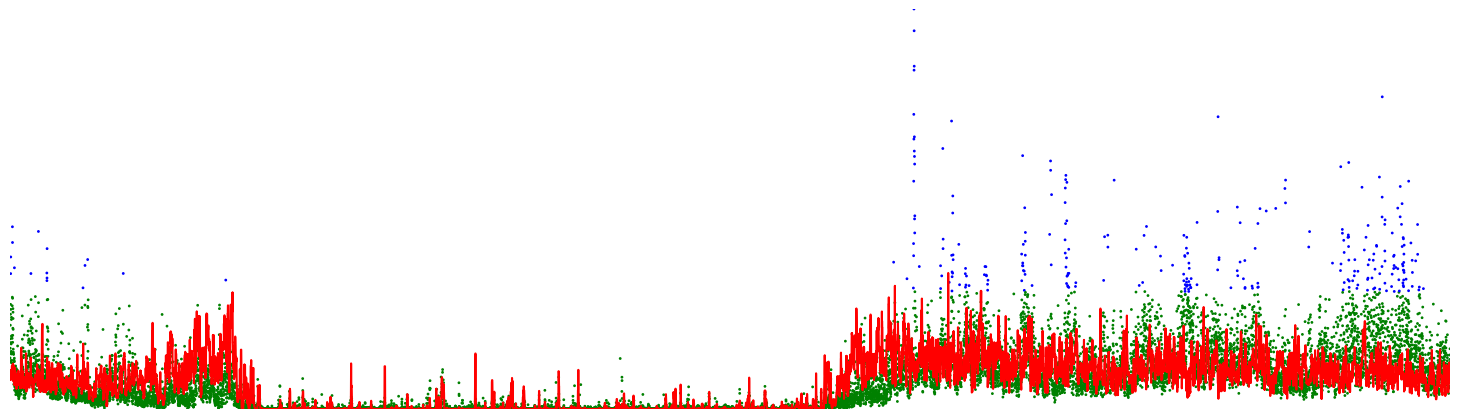

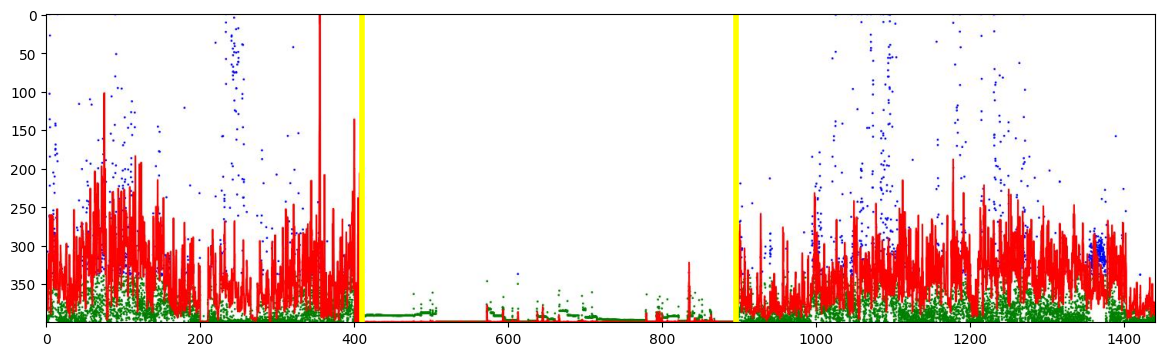

In [189]:
#%matplotlib inline
#plt.figure(figsize=(14.4, 4))
#plt.vlines(x=window['x'], ymin=0, ymax=400, colors="yellow", linewidth=4)
#plt.imshow(image.permute(1, 2, 0));